# Proyecto 03 - Series de Tiempo

## Dataset: Flujo Vehicular por Unidades de Peaje AUSA

**Recuerda descargar el dataset de [aquí](https://data.buenosaires.gob.ar/dataset/flujo-vehicular-por-unidades-peaje-ausa). Deberás descargar -  al menos para comenzar - los años 2017, 2018 y 2019.**

En este notebook te dejamos unas celdas para que puedas comenzar a trabajar con este dataset para los años 2017, 2018 y 2019. Si deseas utilizar otros años, ten en cuenta que deberás hacer el preprocesamiento correspondiente, ya que la estructura de los datos puede variar.

**Importante:** Para el proyecto, debes comenzar con los datos de la autopista Illia, pago en Efectivo.

### Exploración de datos

Dedícale un buen tiempo a hacer un Análisis Exploratorio de Datos. Elige preguntas que creas que puedas responder con este dataset. Por ejemplo, ¿Cuáles son los días y horarios de mayor tráfico? También, estudia autocorrelaciones, resampleos, etc.

#### Componentes de la serie

1. Calcula las componentes estacionales y tendencia de la serie. Interpreta los resultados, si es necesario con información auxiliar (por fuera del dataset) o elementos del dataset que no estés utilizando (por ejemplo, si la tendencia es negativa, ¿puede ser porque se migre a otras formas de pago?).
1. ¿La serie posee valores atípicos? Si es así, interpreta, si es necesario con información auxiliar. **Pista**: primer semestre 2019.

### Predicción a Futuro

Debes implementar un modelo que prediga el tráfico en la autopista Illia para el último trimestre del 2019. 

1. Haz todas las transformaciones de datos que consideres necesarias. Justifica.
1. Evalúa de forma apropiada tus resultados. Justifica la métrica elegida.
1. Elige un modelo benchmark y compara tus resultados con este modelo.
1. Optimiza los hiperparámetros de tu modelo. 
1. Intenta responder la pregunta: ¿Qué información está usando el modelo para predecir?
1. Utiliza el modelo creado para predecir el tráfico en el año 2020. ¿Cómo funciona?
1. Si lo deseas, puedes agregar información de años anteriores a 2017. ¿Mejoran los resultados?

### Para pensar, investigar y, opcionalmente, implementar
1. ¿Cómo incorporarías la información sobre tipo de vehículo, forma de pago, sentido, día de la semana, etc.? En lo que respecta a las predicciones, ¿mejoran o empeoran?
1. ¿Qué ocurre si comparas las series de tiempo entre distintas estaciones de peajes?¿Tienen el mismo comportamiento o hay alguna que sea distinta a las otras? Si es así, ¿hay información auxiliar que te ayude a explicar lo que encuentras?
1. ¿Hay algo que te gustaría investigar o probar?

### **¡Tómate tiempo para investigar y leer mucho!**

### 1. Preparación del Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels import tsa
import seaborn as sns
sns.set()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data_2019 = pd.read_csv('/content/drive/MyDrive/Data Science Acamica/Sprint 3/Proyecto 3 - Series de Tiempo/flujo-vehicular-2017.csv', sep =',')
data_2018 = pd.read_csv('/content/drive/MyDrive/Data Science Acamica/Sprint 3/Proyecto 3 - Series de Tiempo/flujo-vehicular-2018.csv', sep =',')
data_2017 = pd.read_csv('/content/drive/MyDrive/Data Science Acamica/Sprint 3/Proyecto 3 - Series de Tiempo/flujo-vehicular-2019.csv', sep =',')

In [5]:
data_2019.info()
data_2019.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372645 entries, 0 to 1372644
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1372645 non-null  int64 
 1   fecha           1372645 non-null  object
 2   hora_inicio     1372645 non-null  int64 
 3   hora_fin        1372645 non-null  int64 
 4   dia             1372645 non-null  object
 5   estacion        1372645 non-null  object
 6   sentido         1372645 non-null  object
 7   tipo_vehiculo   1372645 non-null  object
 8   forma_pago      1372645 non-null  object
 9   cantidad_pasos  1372645 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 104.7+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,NO COBRADO,25
1,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,TELEPASE,7
2,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,NO COBRADO,5
3,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,2
4,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,94


In [6]:
data_2018.info()
data_2018.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1375908 entries, 0 to 1375907
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1375908 non-null  int64 
 1   fecha           1375908 non-null  object
 2   hora_inicio     1375908 non-null  int64 
 3   hora_fin        1375908 non-null  int64 
 4   dia             1375908 non-null  object
 5   estacion        1375908 non-null  object
 6   sentido         1375908 non-null  object
 7   tipo_vehiculo   1375908 non-null  object
 8   forma_pago      1375908 non-null  object
 9   cantidad_pasos  1375908 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 105.0+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,NO COBRADO,29
1,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,TELEPASE,9
2,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,NO COBRADO,73
3,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,TELEPASE,39
4,2018,2018-01-01,2,3,Lunes,Alberdi,Centro,Liviano,NO COBRADO,115


In [7]:
data_2017.info()
data_2017.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812153 entries, 0 to 812152
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   periodo         812153 non-null  int64 
 1   fecha           812153 non-null  object
 2   hora_inicio     812153 non-null  int64 
 3   hora_fin        812153 non-null  int64 
 4   dia             812153 non-null  object
 5   estacion        812153 non-null  object
 6   sentido         812153 non-null  object
 7   tipo_vehiculo   812153 non-null  object
 8   forma_pago      812153 non-null  object
 9   cantidad_pasos  812153 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 62.0+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,NO COBRADO,22
1,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,TELEPASE,6
2,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,NO COBRADO,53
3,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,TELEPASE,18
4,2019,2019-01-01,0,1,Martes,Avellaneda,Centro,Liviano,EFECTIVO,16


Investiguemos que valores toman los campos **estacion, sentido, tipo_vehiculo y forma_pago**

In [8]:
print(data_2019['estacion'].unique())
print(data_2018['estacion'].unique())
print(data_2017['estacion'].unique())

['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']
['Alberti' 'Avellaneda' 'Dellepiane' 'Illia' 'Retiro' 'Salguero'
 'Sarmiento' 'PDB']


In [9]:
print(data_2019['sentido'].unique())
print(data_2018['sentido'].unique())
print(data_2017['sentido'].unique())

['Centro' 'Provincia']
['Centro' 'Provincia']
['Centro' 'Provincia']


In [10]:
print(data_2019['tipo_vehiculo'].unique())
print(data_2018['tipo_vehiculo'].unique())
print(data_2017['tipo_vehiculo'].unique())

['Liviano' 'Pesado']
['Liviano' 'Pesado']
['Liviano' 'Pesado']


In [11]:
print(data_2019['forma_pago'].unique())
print(data_2018['forma_pago'].unique())
print(data_2017['forma_pago'].unique())

['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'TARJETA DISCAPACIDAD' 'EXENTO'
 'INFRACCION' 'MONEDERO' 'Otros']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'TARJETA DISCAPACIDAD'
 'INFRACCION']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'INFRACCION'
 'T. DISCAPACIDAD']


##### Podemos decir entonces que los años 2017, 2018 y 2019 tienen las siguientes columnas con la siguiente información:

**periodo**: año del dset 

**fecha**: año dia mes

**hora_inicio** hora de inicio de la cuenta de vehiculos (DROP)

**hora_fin** hora de fin de la cuenta de vehiculos (Vamos a usar esta para tomar la hora)

**dia**: dia de la semana 

**estacion**: estaciones de peaje, difieren levemente entre los años (Dellepiane se unifica en 2019, antes habia Dellepiane Liniers y Centro, y se agrega PDB)

**sentido**: Centro o Provincia

**tipo_vehiculo**: Liviano o Pesado

**forma_pago**: Hay varias y varian entre los años.

**cantidad_pasos**: Cantidad de vehiculos

Vamos a estar trabajando con la estación **Illia** y la forma de pago **Efectivo**


In [12]:
#Unimos los 3 datasets, podemos hacerlo asi directamente ya que tienen las mismas columnas
dataset = pd.concat([data_2019, data_2018, data_2017])

#Nos quedamos solamente con la estación Illia y la forma de pago Efectivo
mask = np.logical_and(dataset.estacion=='Illia', dataset.forma_pago == 'EFECTIVO')
dataset = dataset[mask]

#Quitamos las columnas que no vamos a utilizar
dataset.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)

dataset.head()

,fecha,hora_fin,dia,sentido,tipo_vehiculo,cantidad_pasos
1750,2017-01-01,1,Domingo,Centro,Liviano,1
1755,2017-01-01,2,Domingo,Centro,Liviano,10
1757,2017-01-01,2,Domingo,Centro,Liviano,783
1761,2017-01-01,2,Domingo,Centro,Pesado,3
1764,2017-01-01,3,Domingo,Centro,Liviano,14


In [13]:
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
dataset['fecha2'] = pd.to_datetime(dataset.fecha) + pd.to_timedelta(dataset.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
dataset.drop(columns=['fecha','hora_fin'], inplace = True)

dataset.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha2
1750,Domingo,Centro,Liviano,1,2017-01-01 01:00:00
1755,Domingo,Centro,Liviano,10,2017-01-01 02:00:00
1757,Domingo,Centro,Liviano,783,2017-01-01 02:00:00
1761,Domingo,Centro,Pesado,3,2017-01-01 02:00:00
1764,Domingo,Centro,Liviano,14,2017-01-01 03:00:00


In [14]:
#Corregimos el nombre de fecha2 a fecha
dataset.rename(columns = {'fecha2':'fecha'}, inplace = True) 
dataset.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
1750,Domingo,Centro,Liviano,1,2017-01-01 01:00:00
1755,Domingo,Centro,Liviano,10,2017-01-01 02:00:00
1757,Domingo,Centro,Liviano,783,2017-01-01 02:00:00
1761,Domingo,Centro,Pesado,3,2017-01-01 02:00:00
1764,Domingo,Centro,Liviano,14,2017-01-01 03:00:00


In [15]:
#Reordenamos el dataset por fecha
dataset.sort_values('fecha', inplace = True)
dataset.reset_index(drop=True, inplace = True)
dataset

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
0,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00
1,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00
2,Domingo,Provincia,Pesado,6,2017-01-01 00:00:00
3,Domingo,Provincia,Liviano,644,2017-01-01 00:00:00
4,Domingo,Centro,Liviano,23,2017-01-01 00:00:00
...,...,...,...,...,...
238864,Martes,Centro,Pesado,2,2019-12-31 22:00:00
238865,Martes,Provincia,Liviano,556,2019-12-31 22:00:00
238866,Martes,Provincia,Pesado,1,2019-12-31 22:00:00
238867,Martes,Centro,Liviano,214,2019-12-31 23:00:00


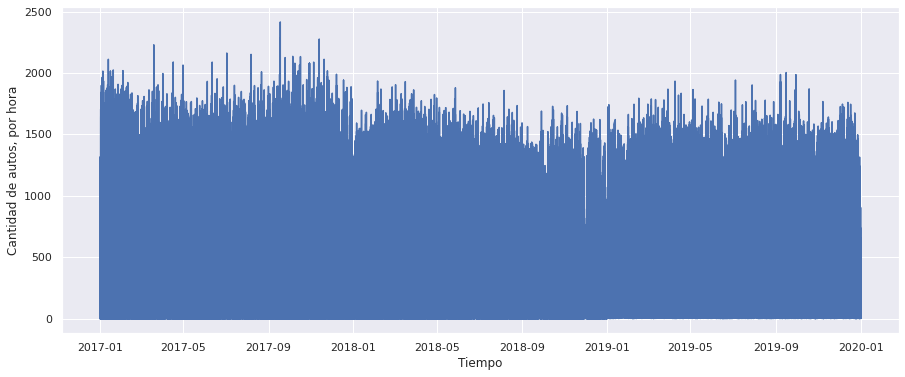

In [16]:
#Graficamos nuestros datos, tal como están
plt.figure(figsize = (15,6))
plt.plot(dataset.fecha, dataset.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por hora')
plt.show()

#EDA

In [17]:
data = pd.concat([data_2017,data_2018,data_2019])
data

,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,NO COBRADO,22
1,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,TELEPASE,6
2,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,NO COBRADO,53
3,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,TELEPASE,18
4,2019,2019-01-01,0,1,Martes,Avellaneda,Centro,Liviano,EFECTIVO,16
...,...,...,...,...,...,...,...,...,...,...
1372640,2017,2017-12-31,22,23,Domingo,Sarmiento,Provincia,Liviano,NO COBRADO,3
1372641,2017,2017-12-31,22,23,Domingo,Sarmiento,Provincia,Liviano,TELEPASE,10
1372642,2017,2017-12-31,22,23,Domingo,Sarmiento,Provincia,Pesado,TELEPASE,1
1372643,2017,2017-12-31,23,0,Domingo,Sarmiento,Provincia,Liviano,NO COBRADO,1


In [18]:
data['fecha'] = pd.to_datetime(data.fecha, yearfirst=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3560706 entries, 0 to 1372644
Data columns (total 10 columns):
 #   Column          Dtype         
---  ------          -----         
 0   periodo         int64         
 1   fecha           datetime64[ns]
 2   hora_inicio     int64         
 3   hora_fin        int64         
 4   dia             object        
 5   estacion        object        
 6   sentido         object        
 7   tipo_vehiculo   object        
 8   forma_pago      object        
 9   cantidad_pasos  int64         
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 298.8+ MB


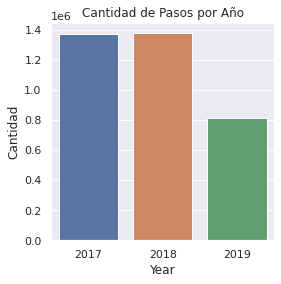

In [19]:
plt.figure(figsize=(4,4))
sns.countplot(x=data.periodo)
plt.title('Cantidad de Pasos por Año')
plt.xlabel('Year')
plt.ylabel('Cantidad')
plt.show();

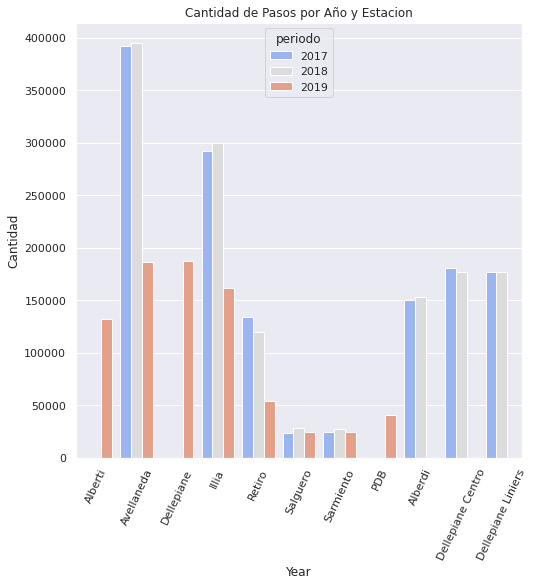

In [20]:
plt.figure(figsize=(8,8))
sns.countplot(x=data.estacion, hue= data.periodo, palette='coolwarm') 
plt.title('Cantidad de Pasos por Año y Estacion')
plt.xlabel('Year')
plt.ylabel('Cantidad')
plt.xticks(rotation=65)
plt.show();

In [21]:
# Extrayendo el mes de la columna fecha
data['mes'] = data.fecha.dt.month_name()

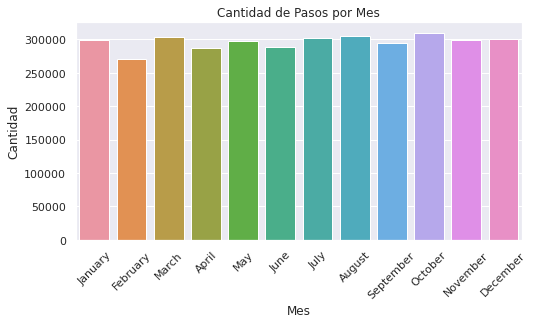

In [22]:
plt.figure(figsize=(8,4))
sns.countplot(x=data.mes)
plt.title('Cantidad de Pasos por Mes')
plt.ylabel('Cantidad')
plt.xlabel('Mes')
plt.xticks(rotation=45)
plt.show();

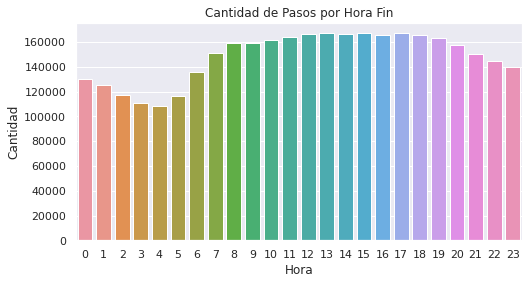

In [23]:
plt.figure(figsize=(8,4))
sns.countplot(x=data.hora_fin)
plt.title('Cantidad de Pasos por Hora Fin')
plt.ylabel('Cantidad')
plt.xlabel('Hora')
plt.show();

In [24]:
data.forma_pago.value_counts(ascending=False)

TELEPASE                1027861
EFECTIVO                1020176
EXENTO                   464708
INFRACCION               405034
NO COBRADO               380450
TARJETA DISCAPACIDAD     186454
T. DISCAPACIDAD           76001
MONEDERO                     14
Otros                         8
Name: forma_pago, dtype: int64

In [25]:
# Unifique criterios para la columna forma de pago
data['forma_pago'] = data.forma_pago.apply(lambda x:'T. DISCAPACIDAD' if (x =='TARJETA DISCAPACIDAD') else x)

In [26]:
data.forma_pago.value_counts(ascending=False)

TELEPASE           1027861
EFECTIVO           1020176
EXENTO              464708
INFRACCION          405034
NO COBRADO          380450
T. DISCAPACIDAD     262455
MONEDERO                14
Otros                    8
Name: forma_pago, dtype: int64

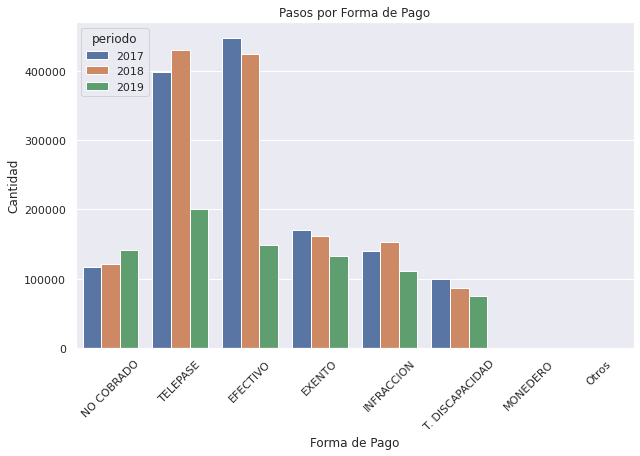

In [27]:
plt.figure(figsize=(10,6))
sns.countplot(x = data.forma_pago, hue = data.periodo)
plt.title('Pasos por Forma de Pago')
plt.xlabel('Forma de Pago')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show();

In [28]:
data.cantidad_pasos.sum()

374637707

In [29]:
data.groupby(['tipo_vehiculo','periodo'])[[ 'cantidad_pasos']].sum()

cantidad_pasos
tipo_vehiculo periodo                
Liviano       2017          113674277
              2018          112371359
              2019          112119160
Pesado        2017           11159213
              2018           10722333
              2019           14591365

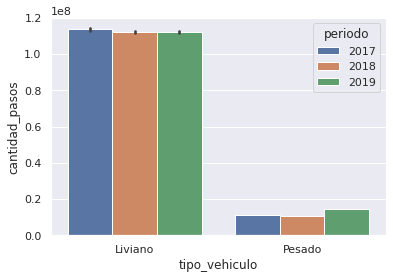

In [30]:
plt
sns.barplot(x=data.tipo_vehiculo, y=data.cantidad_pasos, hue=data.periodo, estimator=np.sum)

#Componentes de la Serie

- Diaria
- Semanal
- Mensual

**Diaria**

In [31]:
#Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable
diario = dataset.resample('D', on = 'fecha').sum()
print(diario.shape)
diario.head()

(1095, 1)


,cantidad_pasos
fecha,
2017-01-01,31183
2017-01-02,51568
2017-01-03,51093
2017-01-04,53332
2017-01-05,56486


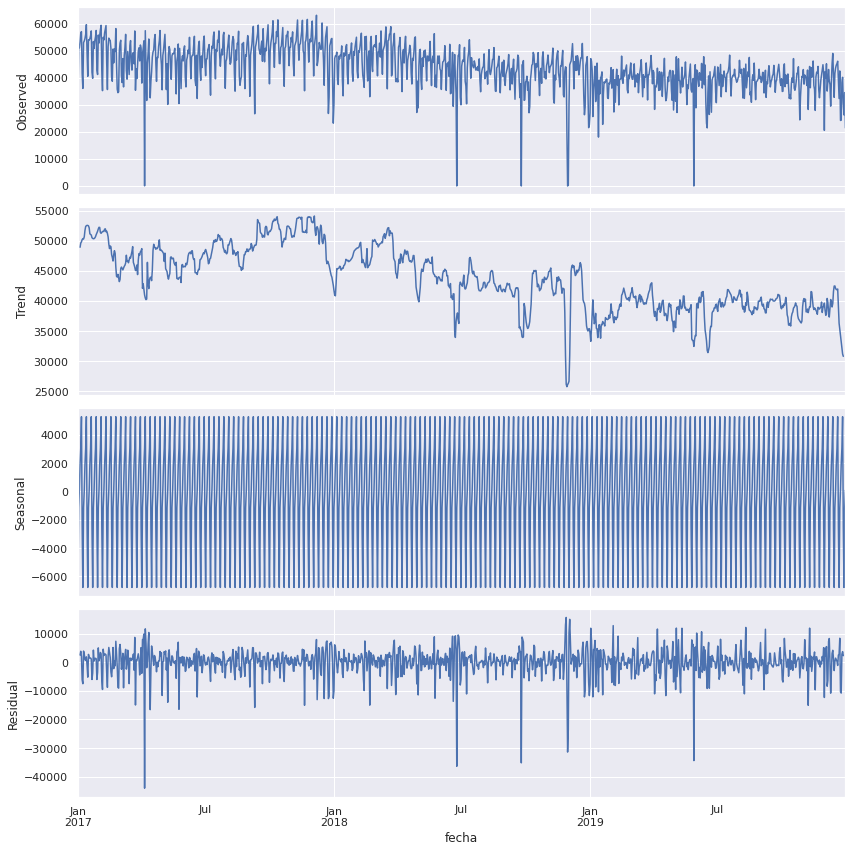

In [32]:
result = seasonal_decompose(diario.cantidad_pasos, model='additive')
plt.rcParams['figure.figsize'] = [12,12]
result.plot()
plt.show()

**Semanal**

In [33]:
semanal = dataset.resample('W',on='fecha').sum()
print('Shape: ', semanal.shape)
semanal.head()

Shape:  (158, 1)


,cantidad_pasos
fecha,
2017-01-01,31183
2017-01-08,347212
2017-01-15,366413
2017-01-22,357215
2017-01-29,354581


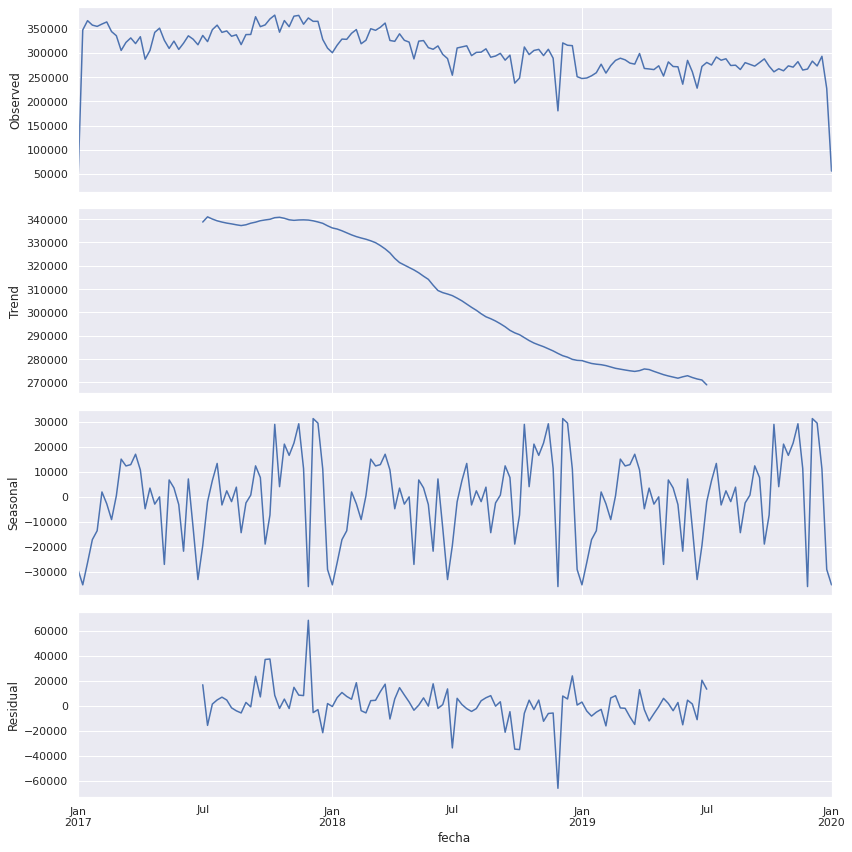

In [45]:
result= seasonal_decompose(semanal.cantidad_pasos, model='additive')
plt.rcParamsDefault['figure.figsize'] = [12,12]
result.plot()
plt.show()

**Mensual**

In [35]:
mensual = dataset.resample('M',on='fecha').sum()
print('Shape: ',mensual.shape)
mensual.head()

Shape:  (36, 1)


,cantidad_pasos
fecha,
2017-01-31,1565260
2017-02-28,1363113
2017-03-31,1451214
2017-04-30,1373985
2017-05-31,1407136


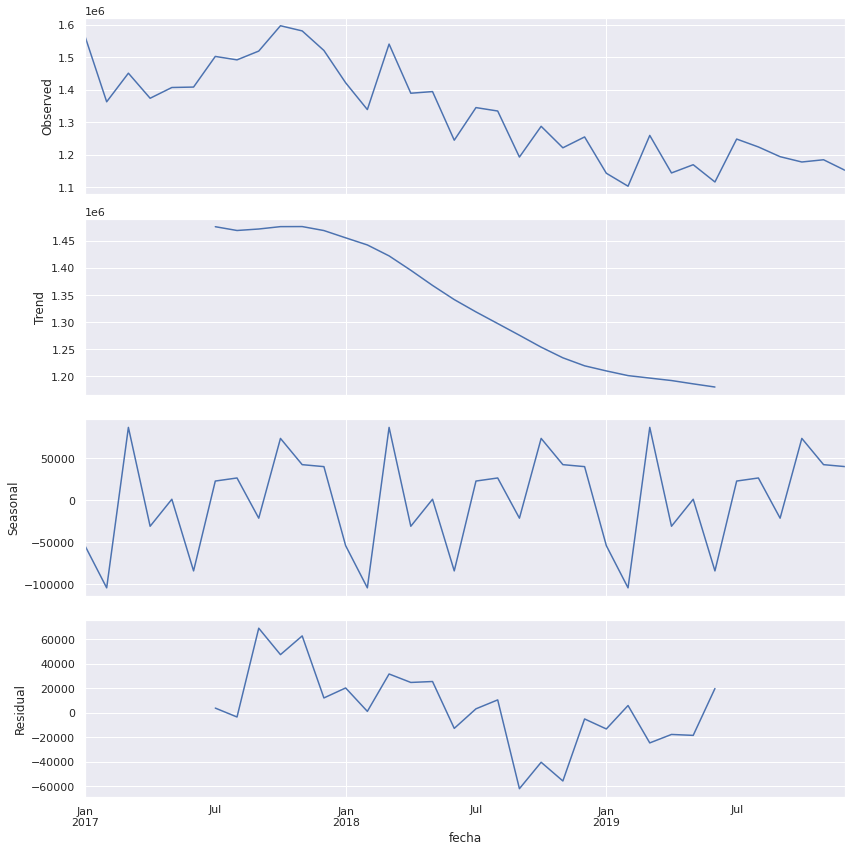

In [36]:
result = seasonal_decompose(mensual.cantidad_pasos, model='additive')
plt.rcParams['figure.figsize']= (12,12)
result.plot()
plt.show()


#Conclusiones de estacionalidad



---



---



In [39]:
#semanal_promedio_tendencia = dataset.cantidad_pasos.rolling(window=51, center = True).mean()
#semanal_promedio_tendencia

In [40]:
#semanal_promedio = pd.DataFrame()
#semanal_promedio['fecha'] = dataset.fecha
#semanal_promedio['cantidad_pasos'] = semanal_promedio_tendencia

In [41]:
#semanal_promedio=semanal_promedio.resample('W', on='fecha').sum()

In [42]:
semanal.cantidad_pasos.std()

47342.85444857278

In [43]:
s =(result.trend + result.seasonal).std()

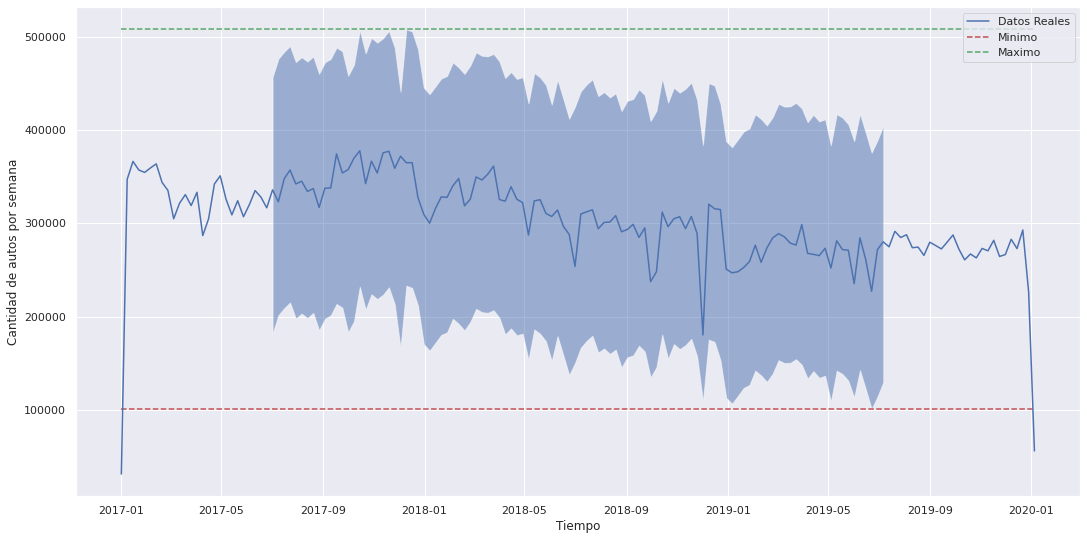

In [46]:
#Ejecutar primero la celdda de descomposion semanal

plt.figure(figsize = (18,9))
plt.plot(semanal.index, semanal.cantidad_pasos, label ='Datos Reales')
plt.fill_between(semanal.index, ((result.trend + result.seasonal) - s), ((result.trend + result.seasonal) + s) ,alpha =0.5)
#plt.plot(senial.index[look_back: look_back + N_train], pred_1_train,'-.',label = 'Predicho en Train')
#plt.plot(semanal.index, result.trend + result.seasonal, label = '- residuo')
#plt.plot(semanal.index,result.observed -  result.resid, label = 'otro')
#plt.plot(semanal_promedio.index, semanal_promedio.cantidad_pasos, label ='Rolling')
#plt.plot(semanal.index,max, label = 'MAx')
#plt.plot(semanal.index, min, label='min')
plt.hlines(((result.trend + result.seasonal) - s).min(), xmin=semanal.index.min(), xmax=semanal.index.max(), linestyles ='dashed',label='Minimo' , colors='r')
plt.hlines(((result.trend + result.seasonal) + s).max(), xmin=semanal.index.min(), xmax=semanal.index.max(), label= 'Maximo', colors='g',linestyles ='dashed' )
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos por semana')
plt.legend()

plt.show()

In [47]:
((result.trend + result.seasonal) - s).min()

100909.81089803169

In [48]:
((result.trend + result.seasonal) + s).max()

508054.2404456567

#Eliminando atipicos

Inicialmente quitaremos los valores que corresponden a la primera fecha y a la ultima:

- Porque no sabemos en que dia empezo a contar esa semana.
- Como sabemos los primeros de enero viaja muy poca gente.







In [49]:
semanal

,cantidad_pasos
fecha,
2017-01-01,31183
2017-01-08,347212
2017-01-15,366413
2017-01-22,357215
2017-01-29,354581
...,...
2019-12-08,282891
2019-12-15,272960
2019-12-22,292881


In [50]:
semanal.reset_index(inplace=True)

In [51]:
semanal

,fecha,cantidad_pasos
0,2017-01-01,31183
1,2017-01-08,347212
2,2017-01-15,366413
3,2017-01-22,357215
4,2017-01-29,354581
...,...,...
153,2019-12-08,282891
154,2019-12-15,272960
155,2019-12-22,292881
156,2019-12-29,226390


In [52]:

#diario.cantidad_pasos[diario.cantidad_pasos < 25000] = np.nan
semanal.cantidad_pasos[semanal.cantidad_pasos < 200000] = np.nan
print('Nulos:', semanal.cantidad_pasos.isnull().sum())
semanal = semanal.interpolate()
print('Nulos:', semanal.cantidad_pasos.isnull().sum())
#plt.boxplot(diario.cantidad_pasos)
#semanal.Tmin[semanal.Tmin > 50] = np.nan
#semanal.dropna(inplace=True)



Nulos: 3
Nulos: 1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [53]:
print(semanal.shape)
semanal.drop(index=[0,157], inplace=True)
print(semanal.shape)

(158, 2)
(156, 2)


In [54]:
semanal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156 entries, 1 to 156
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   fecha           156 non-null    datetime64[ns]
 1   cantidad_pasos  156 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.7 KB


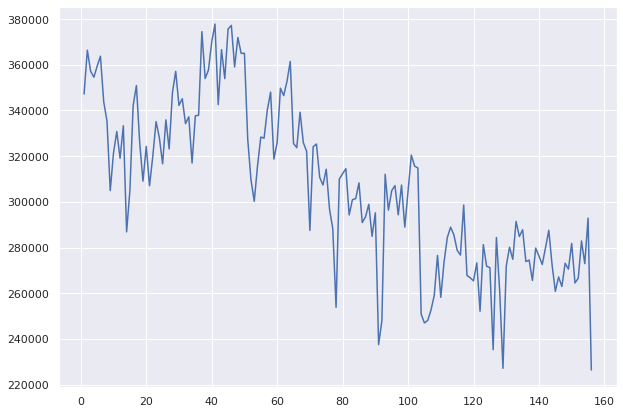

In [55]:
plt.figure(figsize=(10,7))
plt.plot(semanal.index, semanal.cantidad_pasos)

#Autocorrelacion

In [56]:
from statsmodels.tsa.stattools import acf

nlags =  semanal.shape[0]
autocorr = acf(semanal.cantidad_pasos, nlags = nlags)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


In [57]:
autocorr.shape

(156,)

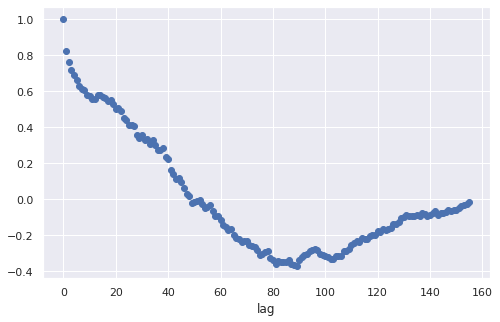

In [58]:
plt.figure(figsize = (8,5))
plt.scatter(np.arange(nlags), autocorr)
plt.xlabel('lag');

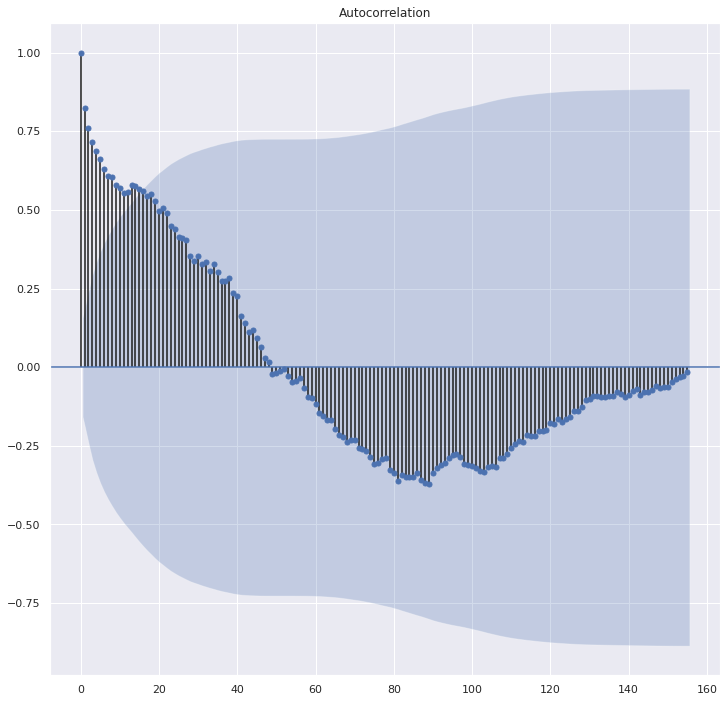

In [59]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(semanal.cantidad_pasos, lags = semanal.shape[0]-1)
plt.show();


#Matriz de Datos

In [60]:
senial = semanal.cantidad_pasos
senial.head()
senial.shape

(156,)

In [61]:
look_back = 16

In [62]:
N = senial.shape[0]
X = np.zeros((N - look_back - 1,look_back))
y = np.zeros(N - look_back - 1)
print(X.shape, y.shape)

(139, 16) (139,)


In [63]:
 for i in range(X.shape[0]):
#     X[i,:] = senial.values.iloc[i:i+look_back]
#     y[i] = senial.values.iloc[i+look_back]
    X[i,:] = senial.iloc[i:i+look_back]
    y[i] = senial.iloc[i+look_back]
    

In [64]:
N_train = (N - 13)- look_back # cantidad de instancias que vamos a usar para entrenar. 
N_test = 12 #cantidad de puntos que vamos a usar para evaluar
N_total = N_train + N_test

length_total = N_train + N_test + look_back

X_train = X[:N_train,:]
y_train = y[:N_train]
print(X_train.shape, y_train.shape)

X_test = X[N_train:N_train+N_test,:]
y_test = y[N_train:N_train+N_test]
print(X_test.shape, y_test.shape)

(127, 16) (127,)
(12, 16) (12,)


#Modelado

**RandomForestRegressor**

In [65]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=300, max_depth= 5 ,random_state=42, n_jobs =-1).fit(X_train,y_train)

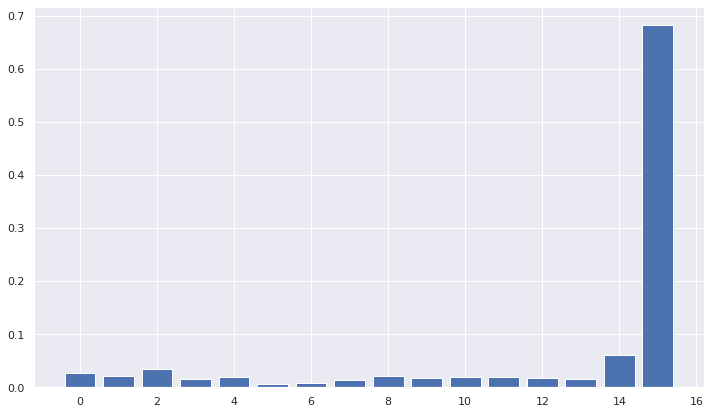

In [66]:
plt.figure(figsize = (12,7))
plt.bar(np.arange(rf.feature_importances_.size),rf.feature_importances_)
# for x in np.arange(3)*52:
#     plt.axvline(x, linestyle ='--', color= 'r')
plt.show()

In [67]:
y_pred = rf.predict(X)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

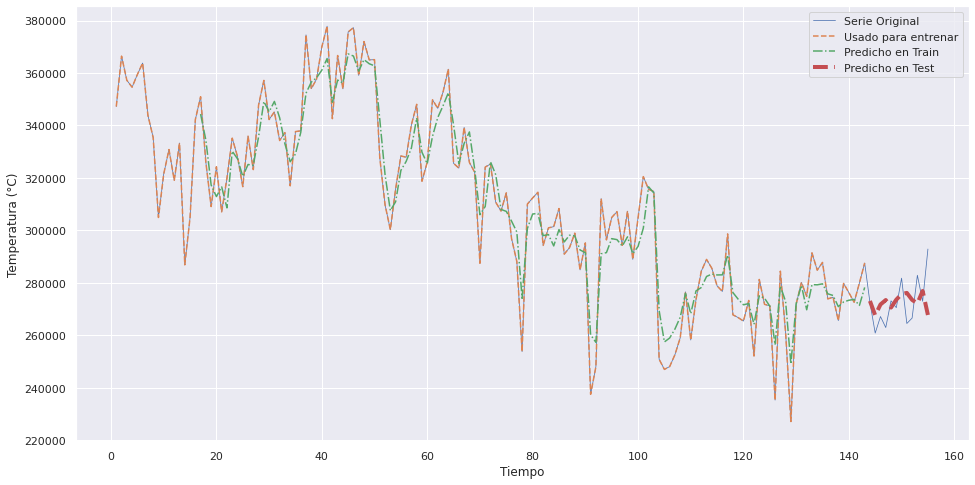

In [68]:
plt.figure(figsize=(16,8))
plt.plot(senial.index[:length_total], senial[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(senial.index[:N_train + look_back], senial[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(senial.index[look_back: look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(senial.index[N_train+look_back: length_total], y_test_pred,'--', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Temperatura (°C)')
plt.show()

In [69]:
print(np.sqrt(mean_squared_error(y_pred=y_test_pred, y_true=y_test)))

9907.998093834334


**Support Vector Machine**

In [70]:
%%time
from sklearn.svm import  SVC, SVR
svm = SVR( kernel='poly', degree=5)

model_1= svm.fit(X_train,y_train)

pred_1_train = model_1.predict(X_train) 
pred_1_test = model_1.predict(X_test)


CPU times: user 1min 6s, sys: 20 ms, total: 1min 6s
Wall time: 1min 6s


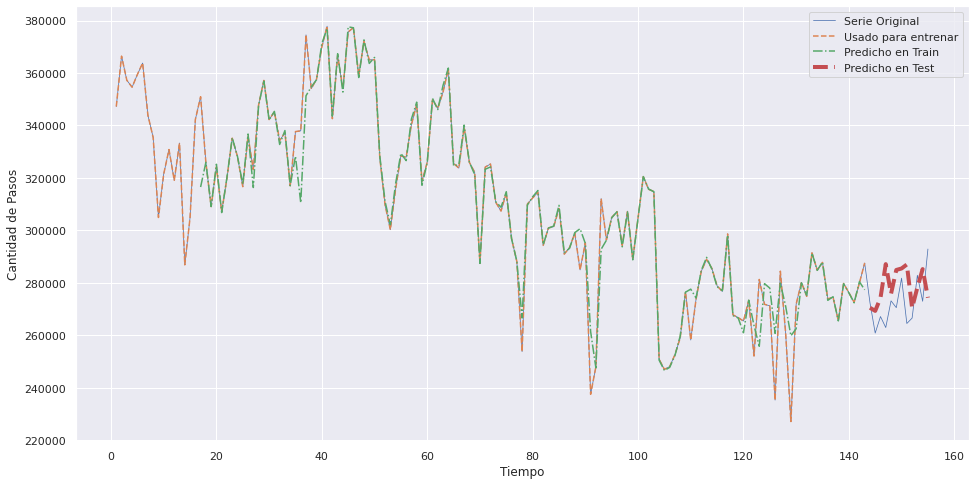

In [71]:
plt.figure(figsize=(16,8))
plt.plot(senial.index[:length_total], senial[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(senial.index[:N_train + look_back], senial[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(senial.index[look_back: look_back + N_train], pred_1_train,'-.',label = 'Predicho en Train')
plt.plot(senial.index[N_train+look_back: length_total], pred_1_test,'--', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de Pasos')
plt.show()

In [72]:
print(np.sqrt(mean_squared_error(y_pred=pred_1_test, y_true=y_test)))

12829.345116616067


**XGBRegressor**

[13:07:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


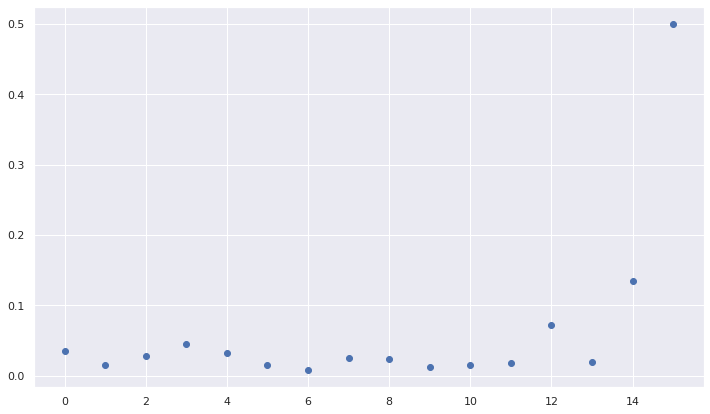

In [73]:
from xgboost import XGBRegressor
xgb = XGBRegressor(max_depth=5,n_estimators=50, learning_rate=0.1, n_jobs=-1).fit(X_train,y_train)

pred_2_train = xgb.predict(X_train) 
pred_2_test = xgb.predict(X_test)

plt.figure(figsize = (12,7))
plt.scatter(np.arange(xgb.feature_importances_.size),xgb.feature_importances_)
plt.show()




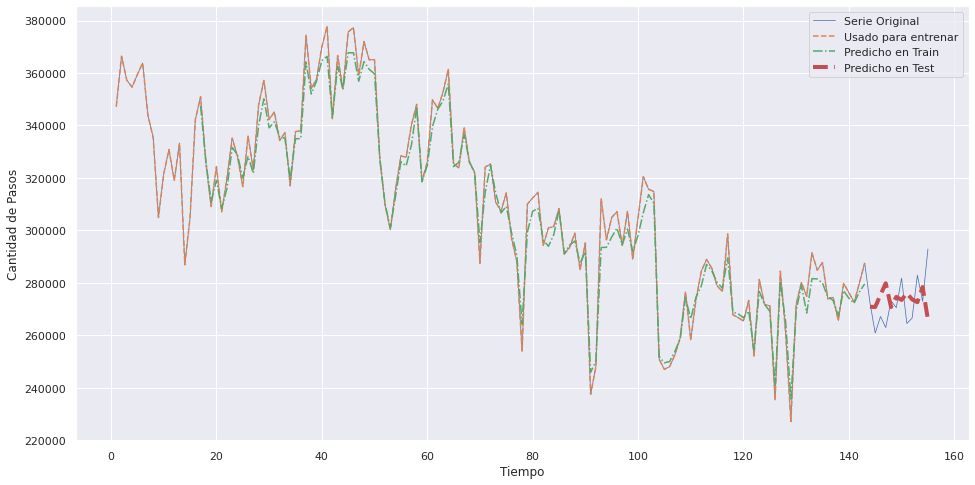

In [74]:
plt.figure(figsize=(16,8))
plt.plot(senial.index[:length_total], senial[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(senial.index[:N_train + look_back], senial[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(senial.index[look_back: look_back + N_train], pred_2_train,'-.',label = 'Predicho en Train')
plt.plot(senial.index[N_train+look_back: length_total], pred_2_test,'--', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de Pasos')
plt.show()

In [75]:
print(np.sqrt(mean_squared_error(y_pred=pred_2_test, y_true=y_test)))

11506.66900155702


#Prediccion


In [76]:
from fbprophet import Prophet
pht = Prophet()

In [77]:
semanal.reset_index(inplace=True)

In [78]:
semanal[['ds','y']] = semanal[['fecha','cantidad_pasos']]
semanal.drop(columns=['fecha','cantidad_pasos'], inplace=True)

In [79]:
semanal.head()

,index,ds,y
0,1,2017-01-08,347212.0
1,2,2017-01-15,366413.0
2,3,2017-01-22,357215.0
3,4,2017-01-29,354581.0
4,5,2017-02-05,359401.0


In [80]:
df = semanal.loc[:(157-12),:]

In [81]:
df

,index,ds,y
0,1,2017-01-08,347212.0
1,2,2017-01-15,366413.0
2,3,2017-01-22,357215.0
3,4,2017-01-29,354581.0
4,5,2017-02-05,359401.0
...,...,...,...
141,142,2019-09-22,279927.0
142,143,2019-09-29,287568.0
143,144,2019-10-06,272483.0
144,145,2019-10-13,260840.0


In [82]:
df.shape

(146, 3)

In [83]:
model = pht.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [84]:
future = model.make_future_dataframe(periods=11,freq='W')

In [85]:
future

,ds
0,2017-01-08
1,2017-01-15
2,2017-01-22
3,2017-01-29
4,2017-02-05
...,...
152,2019-12-08
153,2019-12-15
154,2019-12-22
155,2019-12-29


In [86]:
y_pred_t = model.predict(future[11:future.shape[0]-1])
y_pred_test = model.predict(future[future.shape[0]-12:])

In [87]:
y_pred = model.predict(future[11:future.shape[0]-1])

In [88]:
y_pred

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-03-26,344643.473696,326645.098176,365750.093040,344643.473696,344643.473696,1922.299080,1922.299080,1922.299080,1922.299080,1922.299080,1922.299080,0.0,0.0,0.0,346565.772776
1,2017-04-02,344433.092957,318489.339369,358868.150159,344433.092957,344433.092957,-5459.019736,-5459.019736,-5459.019736,-5459.019736,-5459.019736,-5459.019736,0.0,0.0,0.0,338974.073221
2,2017-04-09,344222.712217,312478.691129,357216.496539,344222.712217,344222.712217,-11812.324567,-11812.324567,-11812.324567,-11812.324567,-11812.324567,-11812.324567,0.0,0.0,0.0,332410.387650
3,2017-04-16,344012.331478,310299.737240,351856.569494,344012.331478,344012.331478,-12402.684834,-12402.684834,-12402.684834,-12402.684834,-12402.684834,-12402.684834,0.0,0.0,0.0,331609.646644
4,2017-04-23,343801.950741,313852.586110,357539.531788,343801.950741,343801.950741,-8252.649768,-8252.649768,-8252.649768,-8252.649768,-8252.649768,-8252.649768,0.0,0.0,0.0,335549.300973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,2019-12-01,266394.729421,275422.476406,317445.460829,266076.148286,266722.911342,28928.943574,28928.943574,28928.943574,28928.943574,28928.943574,28928.943574,0.0,0.0,0.0,295323.672995
141,2019-12-08,266058.073051,280185.263441,321229.567261,265644.302696,266476.037343,34759.505767,34759.505767,34759.505767,34759.505767,34759.505767,34759.505767,0.0,0.0,0.0,300817.578818
142,2019-12-15,265721.416681,272199.842631,313984.515500,265200.902008,266263.343871,28029.834878,28029.834878,28029.834878,28029.834878,28029.834878,28029.834878,0.0,0.0,0.0,293751.251558
143,2019-12-22,265384.760311,253533.860229,295822.728817,264756.405115,266049.301889,9138.759631,9138.759631,9138.759631,9138.759631,9138.759631,9138.759631,0.0,0.0,0.0,274523.519942


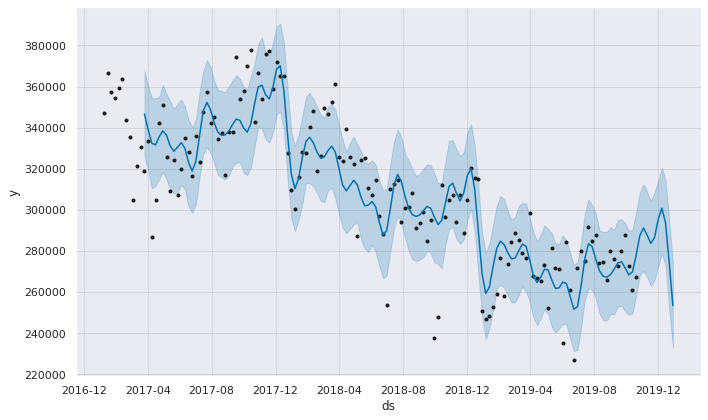

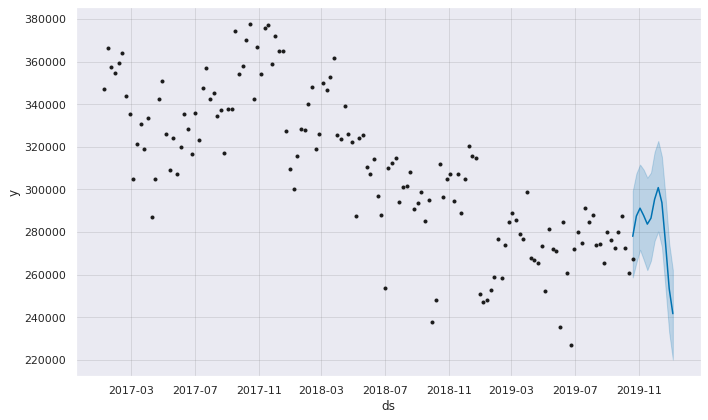

In [89]:
model.plot(y_pred_t)
model.plot(y_pred_test);

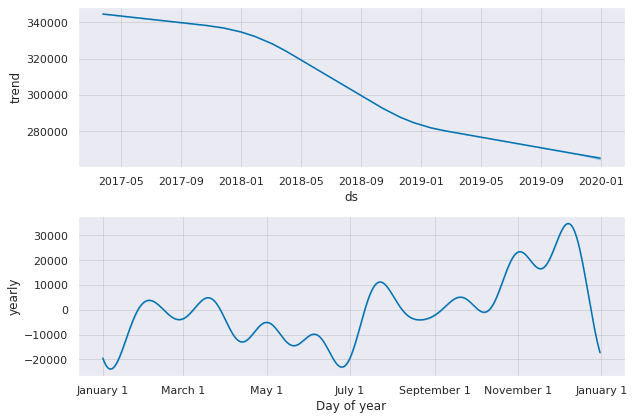

In [90]:
model.plot_components(y_pred);

In [91]:
from sklearn.metrics import mean_squared_error

In [92]:
np.sqrt(mean_squared_error(y_true=y_test, y_pred=y_pred_test.yhat))

25189.24808720308

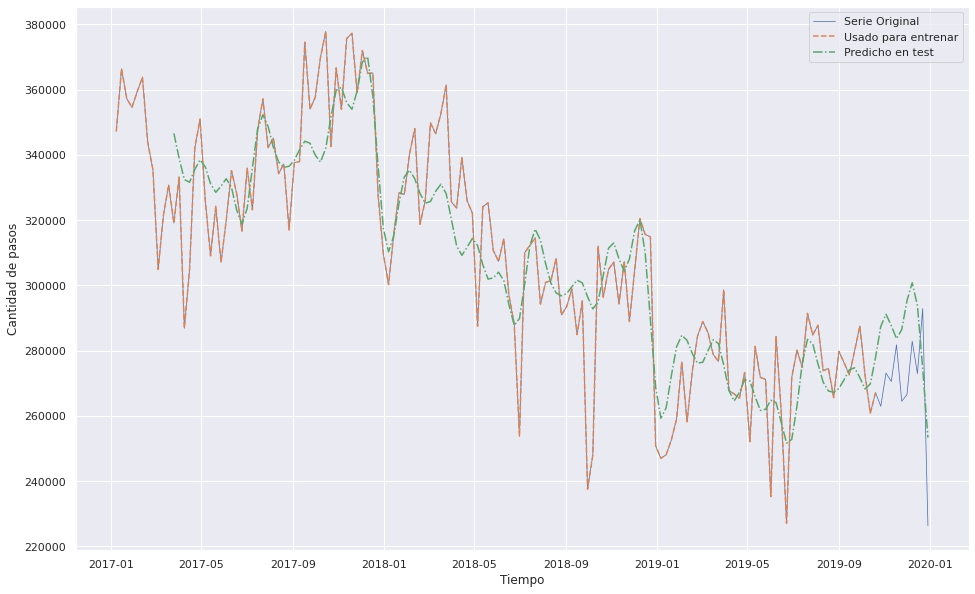

In [93]:
plt.figure(figsize=(16,10))
plt.plot(semanal.ds, semanal.y,lw = 0.75, label = 'Serie Original')
plt.plot(df.ds, df.y,'--', label = 'Usado para entrenar')
plt.plot(y_pred.ds,y_pred_t.yhat,'-.',label = 'Predicho en test')
#plt.fill_between(diario.ds, y_pred.yhat_lower, y_pred.yhat_upper)
#plt.plot(y_pred.ds,y_pred.yhat,'-.', lw = 4, label = 'Predicho en Test. Multi-Step')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de pasos')
plt.show()